Read in the csv file to a data frame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:\\Users\\glmor\\Desktop\\application_train.csv')

Display the columns of the data frame to get a better idea of the types of features I would be interested in.

In [2]:
pd.set_option("display.max_columns",None)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Off of face value I think the age of the person would be a good indication if someone will pay off a loan or not. From assumptions one would think if someone is older and more mature then they would be more likely to pay of a loan compared to a younger individual.

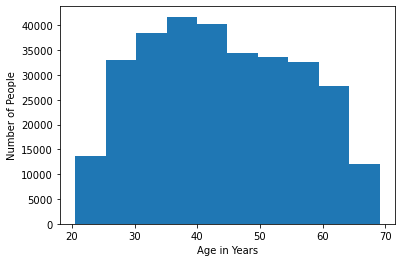

In [3]:
#values were in negative and in days so I 
#made them positive and converted days to years to be more clear
plt.hist((df['DAYS_BIRTH']*-1)/365)
plt.xlabel('Age in Years')
plt.ylabel('Number of People')
plt.show()

This is also something that seems quite obvious in the prediction of if a person pays back a loan or not. If a person is working and has a steady stream of income then they will be more likely then those who do not.

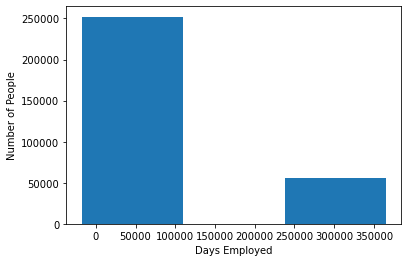

In [4]:
#The data was pretty thinly spread so 3 bins were used to better show the dispursment.
plt.hist(df['DAYS_EMPLOYED'],bins=3)
plt.xlabel('Days Employed')
plt.ylabel('Number of People')
plt.show()

I chose the amount of anuuity because I believe the amount one has to pay back plays a big part in if the loan gets paid back or not.

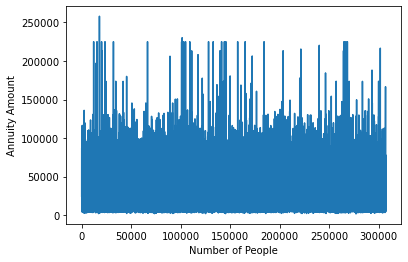

In [5]:
plt.plot(df['AMT_ANNUITY'])
plt.xlabel('Number of People')
plt.ylabel('Annuity Amount')
plt.show()

This is also a very obvious choice for me because the more income someone has the more likely they will make payments on time.

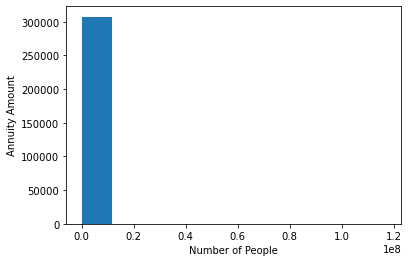

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [6]:
plt.hist(df['AMT_INCOME_TOTAL'])
plt.xlabel('Income Total')
plt.ylabel('Density')
plt.show()
df['AMT_INCOME_TOTAL'].value_counts()

I believe that if someone has good credit they will be more likely to meet repayment requirements.

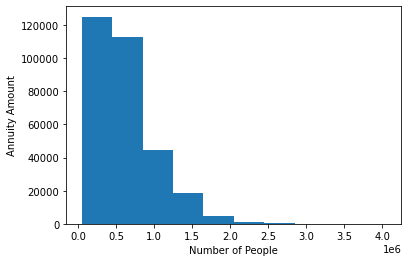

In [7]:
plt.hist(df['AMT_CREDIT'])
plt.xlabel('Amount of Credit')
plt.ylabel('Density')
plt.show()

The goods price the applicant asked for on the last application I believe is a strong indicator if they are able to pay it back or not. If they are asking for a lot I would assume that means they do not have too much money at that point which brings red flags for repayment.

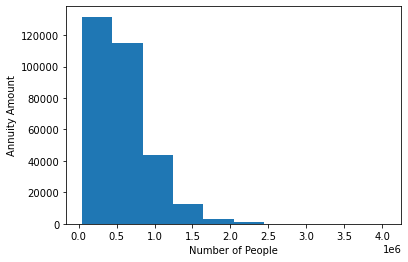

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [38]:
plt.hist(df['AMT_GOODS_PRICE'])
plt.xlabel('Goods Price')
plt.ylabel('Density')
plt.show()

I felt this to be important because depending on the industry they work in could be the difference between on time payments and late payments

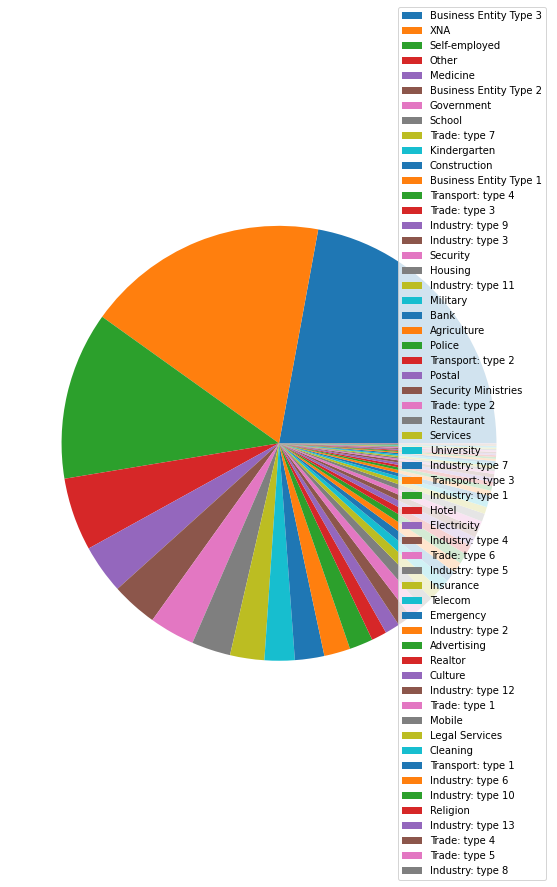

In [22]:
#put value counts into a variable
values = df['ORGANIZATION_TYPE'].value_counts()
#convert variable to a dictionary to be used in a pie graph
values= dict(values)
plt.figure(figsize=(10,10))
plt.pie(values.values())
plt.legend(values.keys(), loc="right")
plt.show()

The rational behind this choice is the same as the rationale in the markdown above.

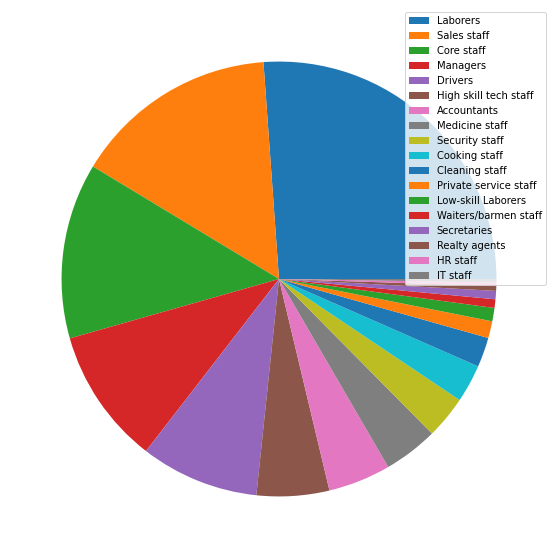

In [24]:
#put value counts into a variable
values = df['OCCUPATION_TYPE'].value_counts()
#convert variable to a dictionary to be used in a pie graph
values= dict(values)
plt.figure(figsize=(10,10))
plt.pie(values.values())
plt.legend(values.keys(), loc="upper right")
plt.show()

For the last two features I was having trouble trying to decide on which would be best to chose for predictions. Two find the next two I decided to create a default parameter random forest model and use this to to find the top 10 features in terms of feature importance used to make predictions. With this method I found that EXT_SOURCE_2/3 scored extremely high in feature importance.

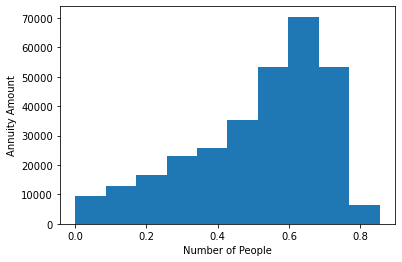

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [36]:
plt.hist(df['EXT_SOURCE_2'])
plt.xlabel('Score')
plt.ylabel('Number of People')
plt.show()

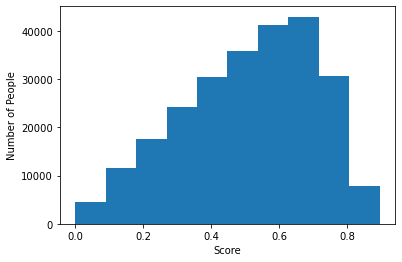

In [37]:
plt.hist(df['EXT_SOURCE_3'])
plt.xlabel('Score')
plt.ylabel('Number of People')
plt.show()